# Определение перспективного тарифа для телеком компании

## Шаг 1. Общая информация

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [6]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [12]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Шаг 2. Подготовка данных

 Приводим данные к нужному виду:
 

In [13]:
data_users.reg_date = data_users.reg_date.apply(pd.to_datetime)

In [14]:
data_messages.message_date = data_messages.message_date.apply(pd.to_datetime)

In [15]:
data_internet.session_date = data_internet.session_date.apply(pd.to_datetime)

In [16]:
data_calls.call_date = data_calls.call_date.apply(pd.to_datetime)

Исправлю ошибки в данных

In [17]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [18]:
data_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [19]:
data_calls = data_calls.replace(0.00, 1)

In [20]:
data_calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [21]:
data_calls['duration'].apply(np.ceil)

0          1.0
1          1.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

Kоличество сделанных звонков и израсходованных минут разговора по месяцам

In [22]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [23]:
data_calls['month'] = data_calls['call_date'].dt.month
data_calls['month'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

In [24]:
data_calls.groupby('month')['duration'].agg(['sum'])

,sum
month,
1,10518.44
2,23768.58
3,46737.85
4,64298.92
5,86301.77
6,102132.71
7,127891.23
8,149302.63
9,168338.16


Kоличество отправленных сообщений по месяцам

In [25]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [26]:
data_messages['month'] = data_messages['message_date'].dt.month
data_messages['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

In [27]:
data_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Объем израсходованного интернет-трафика по месяцам

In [28]:
data_internet['month'] = data_internet['session_date'].dt.month

In [29]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [30]:
internet_users = data_internet.merge(data_users, on='user_id', how='left')

In [31]:
internet_users

,Unnamed: 0,id,mb_used,session_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000_0,112.95,2018-11-25,1000,11,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1000_1,1052.81,2018-09-07,1000,9,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,2,1000_2,1197.26,2018-06-25,1000,6,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,3,1000_3,550.27,2018-08-22,1000,8,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,4,1000_4,302.56,2018-09-24,1000,9,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
149392,149392,1499_153,490.13,2018-12-14,1499,12,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
149393,149393,1499_154,0.00,2018-10-27,1499,10,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
149394,149394,1499_155,1246.32,2018-11-26,1499,11,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [32]:
internet_users.groupby('month')['mb_used'].agg(['sum'])

,sum
month,
1,407732.53
2,955251.65
3,1811835.61
4,2433311.62
5,3525862.24
6,4180017.17
7,5029478.75
8,5998157.07
9,6447422.36


выручку с каждого пользователя 

In [33]:
inter_gr  = data_internet.groupby(['user_id', 'month'])['mb_used'].sum()
inter_gr = inter_gr.reset_index(level = 'month')
users_inter = data_users.merge(inter_gr, on=['user_id'])
users_inter

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91
...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31


In [34]:
messages_gr  = data_messages.groupby(['user_id', 'month'])['id'].count()
messages_gr = messages_gr.reset_index(level = 'month')
users_messag_inter = users_inter.merge(messages_gr, on=['user_id', 'month'], how='left')
users_messag_inter

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,id
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49,22.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77,60.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64,75.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93,81.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36,42.0
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75,11.0
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51,48.0
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31,59.0


In [35]:
calls_gr  = data_calls.groupby(['user_id', 'month'])['duration'].sum()
calls_gr = calls_gr.reset_index(level = 'month')
common = users_messag_inter.merge(calls_gr, on=['user_id', 'month'], how='left')
common

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,id,duration
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49,22.0,155.06
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77,60.0,173.90
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64,75.0,324.80
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93,81.0,399.87
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91,57.0,452.14
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36,42.0,243.63
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75,11.0,65.65
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51,48.0,453.91
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31,59.0,588.50


In [36]:
data_tariffs['gb_per_month_included'] = data_tariffs['mb_per_month_included'] / 1024

In [37]:
data_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff', 'gb_per_month_included']

In [38]:
common = common.merge(data_tariffs, on=['tariff'])
common

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,id,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49,22.0,155.06,1000,30720,3000,1950,150,1,1,30.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77,60.0,173.90,1000,30720,3000,1950,150,1,1,30.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64,75.0,324.80,1000,30720,3000,1950,150,1,1,30.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93,81.0,399.87,1000,30720,3000,1950,150,1,1,30.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91,57.0,452.14,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36,42.0,243.63,50,15360,500,550,200,3,3,15.0
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75,11.0,65.65,50,15360,500,550,200,3,3,15.0
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51,48.0,453.91,50,15360,500,550,200,3,3,15.0
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31,59.0,588.50,50,15360,500,550,200,3,3,15.0


In [39]:
common['gb_used'] = common['mb_used'] / 1024

In [40]:
common['call_price'] = (common['duration'] - common['minutes_included'])*common['rub_per_minute']

In [41]:
common['messages_price'] = (common['id'] - common['messages_included'])*common['rub_per_message']

In [42]:
common['internet_price'] = (common['gb_used'] - common['gb_per_month_included'])*common['rub_per_gb']

In [43]:
common['total'] = np.where(common['call_price'] > 0, common['call_price'], 0)\
                    + np.where(common['messages_price'] > 0, common['messages_price'], 0)\
                    + np.where(common['internet_price'] > 0, common['internet_price'], 0)\
                    + common['rub_monthly_fee']

In [44]:
common['total']

0       1950.000000
1       1950.000000
2       1950.000000
3       1950.000000
4       1950.000000
           ...     
3198    1569.406250
3199     550.000000
3200    1024.318359
3201    1350.958984
3202     598.000000
Name: total, Length: 3203, dtype: float64

In [45]:
common

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,gb_used,call_price,messages_price,internet_price,total
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49,...,1950,150,1,1,30.0,2.200674,-2844.94,-978.0,-4169.898926,1950.000000
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77,...,1950,150,1,1,30.0,22.689229,-2826.10,-940.0,-1096.615723,1950.000000
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64,...,1950,150,1,1,30.0,13.675430,-2675.20,-925.0,-2448.685547,1950.000000
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93,...,1950,150,1,1,30.0,13.726494,-2600.13,-919.0,-2441.025879,1950.000000
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91,...,1950,150,1,1,30.0,14.227451,-2547.86,-943.0,-2365.882324,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36,...,550,200,3,3,15.0,20.097031,-769.11,-24.0,1019.406250,1569.406250
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75,...,550,200,3,3,15.0,1.802490,-1303.05,-117.0,-2639.501953,550.000000
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51,...,550,200,3,3,15.0,17.371592,-138.27,-6.0,474.318359,1024.318359
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31,...,550,200,3,3,15.0,17.542295,265.50,27.0,508.458984,1350.958984


#### Привели столбцы в разных таблицах к нориальному типу to_datetime. В таблице data_calls изменили значения с 0 на 1, так как звонок фактически был совершен и следовательно минута засчиталась. Также все звонки округлил в большую сторону, так как оператором считается, что была потрачена целая минута за разговор, также будет удобнее в дальнейшем работать с целыми числами. Также проанализировали в какие месяцы больше всего израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам., во всех этих категориях больше всего всплеск приходится на конец года, это может быть обусловленно с новогодними праздниками и поздравления людей друг с другом. Также произвели рассчеты помесячной выручки с каждого пользователя.

### 3 Поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

#### 3.1 Минуты разговора

In [46]:
calls_users = data_users.merge(data_calls, on=['user_id'], how='left')
calls_users_tarif = calls_users.merge(data_tariffs, on=['tariff'], how='left')
calls_users_tarif

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,1.00,7.0,1000,30720,3000,1950,150,1,1,30.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,1.00,8.0,1000,30720,3000,1950,150,1,1,30.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85,6.0,1000,30720,3000,1950,150,1,1,30.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80,9.0,1000,30720,3000,1950,150,1,1,30.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18,12.0,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_215,2018-12-26,0.76,12.0,50,15360,500,550,200,3,3,15.0
202611,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_216,2018-10-18,18.83,10.0,50,15360,500,550,200,3,3,15.0
202612,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_217,2018-11-10,10.81,11.0,50,15360,500,550,200,3,3,15.0
202613,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,1499_218,2018-10-06,4.27,10.0,50,15360,500,550,200,3,3,15.0


In [47]:
calls_users_tarif.describe()

,user_id,age,duration,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
count,202615.000000,202615.000000,202607.000000,202607.000000,202615.000000,202615.000000,202615.000000,202615.000000,202615.000000,202615.000000,202615.000000,202615.000000
mean,1253.941534,47.397448,6.951404,8.574067,388.983293,20840.824618,1392.061299,1049.554327,182.158774,2.286351,2.286351,20.352368
std,144.723087,16.466099,5.626759,2.787093,455.110402,7358.416601,1197.658952,670.689013,23.953179,0.958127,0.958127,7.185954
min,1000.000000,18.000000,0.010000,1.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
25%,1126.000000,33.000000,1.300000,7.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
50%,1260.000000,47.000000,6.000000,9.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,15.000000
75%,1379.000000,63.000000,10.700000,11.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000
max,1499.000000,75.000000,38.000000,12.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000


In [48]:
calls_users_tarif.query('tariff == "ultra"')['duration']

0          1.00
1          1.00
2          2.85
3         13.80
4          5.18
          ...  
201181    12.86
201182     9.84
201183     0.56
201184     0.11
201185     1.00
Name: duration, Length: 72298, dtype: float64

In [49]:
calls_users_tarif.query('tariff == "ultra"')['duration'].sum()

503556.19999999995

In [50]:
(503556 / 12) /30

1398.7666666666667

In [51]:
calls_users_tarif.query('tariff == "smart"')['duration']

368       10.82
369       15.36
370        2.94
371        7.39
372       19.07
          ...  
202610     0.76
202611    18.83
202612    10.81
202613     4.27
202614    19.62
Name: duration, Length: 130317, dtype: float64

In [52]:
calls_users_tarif.query('tariff == "smart"')['duration'].sum()


904846.8400000001

In [53]:
(904846 / 12) /30

2513.4611111111108

In [54]:
np.var(calls_users_tarif.query('tariff == "ultra"')['duration'], ddof=1) #дисперсия

31.71522892764658

In [55]:
np.var(calls_users_tarif.query('tariff == "smart"')['duration'], ddof=1) #дисперсия

31.630084172181927

In [56]:
np.std(calls_users_tarif.query('tariff == "ultra"')['duration'], ddof=1) # стандартное отклонение

5.631627555835576

In [57]:
np.std(calls_users_tarif.query('tariff == "smart"')['duration'], ddof=1) # стандартное отклонение

5.624062959478843

In [58]:
calls_users_tarif.query('tariff == "ultra"')['duration'].sum()/calls_users_tarif.query('tariff == "ultra"').shape[0] # стандартное отклонение

6.965008713933995

In [59]:
calls_users_tarif.query('tariff == "smart"')['duration'].sum()/calls_users_tarif.query('tariff == "smart"').shape[0] # стандартное отклонение

6.943429023074503

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'duration')

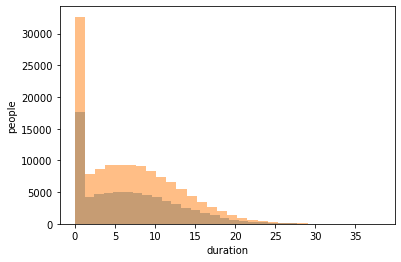

In [60]:
plt.hist(np.array(calls_users_tarif.query('tariff == "ultra"')['duration']), bins=30, alpha = 0.5, histtype = 'bar')
plt.hist(np.array(calls_users_tarif.query('tariff == "smart"')['duration']), bins=30, alpha = 0.5, histtype = 'bar')
plt.ylabel("people")
plt.xlabel("duration")


#### 3.2 Сообщения

In [61]:
messages_grup  = data_messages.groupby(['user_id', 'month'])['id'].count()
messages_grup = messages_grup.reset_index(level = 'month')
messages_users = data_users.merge(messages_grup, on=['user_id'], how='left')
messages_users_tarif = messages_users.merge(data_tariffs, on=['tariff'], how='left')
messages_users_tarif

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,1000,30720,3000,1950,150,1,1,30.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,60.0,1000,30720,3000,1950,150,1,1,30.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,75.0,1000,30720,3000,1950,150,1,1,30.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,81.0,1000,30720,3000,1950,150,1,1,30.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,57.0,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,42.0,50,15360,500,550,200,3,3,15.0
2787,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,11.0,50,15360,500,550,200,3,3,15.0
2788,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,48.0,50,15360,500,550,200,3,3,15.0
2789,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,59.0,50,15360,500,550,200,3,3,15.0


In [62]:
messages_users_tarif.describe()

,user_id,age,month,id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
count,2791.000000,2791.000000,2717.000000,2717.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,1255.030455,46.647438,8.345234,45.283769,329.111430,19872.791114,1234.503762,961.322107,185.309925,2.412397,2.412397,19.407023
std,145.984126,16.460304,2.892920,35.051363,432.804556,6997.766294,1138.959358,637.817240,22.779187,0.911167,0.911167,6.833756
min,1000.000000,18.000000,1.000000,1.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
25%,1126.000000,32.000000,6.000000,19.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
50%,1264.000000,47.000000,9.000000,38.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,15.000000
75%,1383.500000,62.000000,11.000000,63.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000
max,1499.000000,75.000000,12.000000,224.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000


In [63]:
messages_users_tarif.query('tariff == "ultra"')['id']

0       22.0
1       60.0
2       75.0
3       81.0
4       57.0
        ... 
2763    13.0
2764    82.0
2765    82.0
2766    79.0
2767    84.0
Name: id, Length: 820, dtype: float64

In [64]:
messages_users_tarif.query('tariff == "ultra"')['id'].sum()


48623.0

In [65]:
(48623 / 12) / 30 

135.0638888888889

In [66]:
messages_users_tarif.query('tariff == "smart"')['id']

8        NaN
9        4.0
10      11.0
11      13.0
12       4.0
        ... 
2786    42.0
2787    11.0
2788    48.0
2789    59.0
2790    66.0
Name: id, Length: 1971, dtype: float64

In [67]:
messages_users_tarif.query('tariff == "smart"')['id'].sum()

74413.0

In [68]:
(74413 / 12) / 30

206.70277777777775

In [69]:
np.var(messages_users_tarif.query('tariff == "ultra"')['id'], ddof=1) #дисперсия

2109.6591828652

In [70]:
np.var(messages_users_tarif.query('tariff == "smart"')['id'], ddof=1) #дисперсия

717.5942011753547

In [71]:
np.std(messages_users_tarif.query('tariff == "smart"')['id'], ddof=1) # стандартное отклонение

26.787948804926344

In [72]:
np.std(messages_users_tarif.query('tariff == "ultra"')['id'], ddof=1) # стандартное отклонение

45.931026364160424

In [73]:
messages_users_tarif.query('tariff == "ultra"')['id'].sum()/calls_users_tarif.query('tariff == "ultra"').shape[0] # стандартное отклонение

0.6725358931090764

In [74]:
messages_users_tarif.query('tariff == "smart"')['id'].sum()/calls_users_tarif.query('tariff == "smart"').shape[0] # стандартное отклонение

0.5710152934766761

Text(0.5, 0, 'sms')

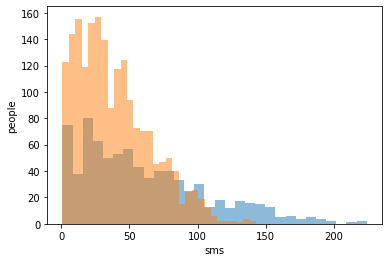

In [75]:
plt.hist(np.array(messages_users_tarif.query('tariff == "ultra"')['id']), bins=30, alpha = 0.5)
plt.hist(np.array(messages_users_tarif.query('tariff == "smart"')['id']), bins=30, alpha = 0.5)
plt.ylabel("people")
plt.xlabel("sms")


#### 3.3 Объем интерет трафика

In [76]:
internet_users = data_users.merge(data_internet, on=['user_id'], how='left')
internet_users_tarif = internet_users.merge(data_tariffs, on=['tariff'], how='left')
internet_users_tarif

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Unnamed: 0,id,...,session_date,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1000_0,...,2018-11-25,11.0,1000,30720,3000,1950,150,1,1,30.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1.0,1000_1,...,2018-09-07,9.0,1000,30720,3000,1950,150,1,1,30.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.0,1000_2,...,2018-06-25,6.0,1000,30720,3000,1950,150,1,1,30.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1000_3,...,2018-08-22,8.0,1000,30720,3000,1950,150,1,1,30.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4.0,1000_4,...,2018-09-24,9.0,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149394,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149391.0,1499_152,...,2018-10-03,10.0,50,15360,500,550,200,3,3,15.0
149395,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149392.0,1499_153,...,2018-12-14,12.0,50,15360,500,550,200,3,3,15.0
149396,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149393.0,1499_154,...,2018-10-27,10.0,50,15360,500,550,200,3,3,15.0
149397,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,149394.0,1499_155,...,2018-11-26,11.0,50,15360,500,550,200,3,3,15.0


In [77]:
internet_users_tarif.describe()

,user_id,age,Unnamed: 0,mb_used,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
count,149399.000000,149399.000000,149396.000000,149396.000000,149396.000000,149399.000000,149399.000000,149399.000000,149399.000000,149399.000000,149399.000000,149399.000000,149399.000000
mean,1252.099947,46.589140,74697.500000,370.192426,8.563315,290.738224,19252.356977,1133.521643,904.772120,187.329567,2.493183,2.493183,18.801130
std,144.050073,16.740338,43127.054745,278.300951,2.788717,413.216122,6681.052245,1087.410847,608.950074,21.748217,0.869929,0.869929,6.524465
min,1000.000000,18.000000,0.000000,0.000000,1.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
25%,1130.000000,31.000000,37348.750000,138.187500,7.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,15.000000
50%,1251.000000,47.000000,74697.500000,348.015000,9.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,15.000000
75%,1380.000000,62.000000,112046.250000,559.552500,11.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000
max,1499.000000,75.000000,149395.000000,1724.830000,12.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,30.000000


In [78]:
internet_users_tarif.query('tariff == "ultra"')['mb_used']

0          112.95
1         1052.81
2         1197.26
3          550.27
4          302.56
           ...   
148050     736.58
148051     304.05
148052     465.11
148053     602.81
148054     540.10
Name: mb_used, Length: 37859, dtype: float64

In [79]:
internet_users_tarif.query('tariff == "ultra"')['mb_used'].sum()

19176773.13

In [80]:
((19176773 / 1024) / 12) / 30

52.02032606336806

In [81]:
internet_users_tarif.query('tariff == "smart"')['mb_used']

211        179.23
212        964.73
213        997.21
214         54.33
215        373.57
           ...   
149394     318.90
149395     490.13
149396       0.00
149397    1246.32
149398     544.37
Name: mb_used, Length: 111540, dtype: float64

In [82]:
internet_users_tarif.query('tariff == "smart"')['mb_used'].sum()

36128494.599999994

In [83]:
((36128494 / 1024) / 12) / 30

98.00481228298612

In [84]:
np.var(internet_users_tarif.query('tariff == "ultra"')['mb_used'], ddof=1) #дисперсия

82418.70264590823

In [85]:
np.var(internet_users_tarif.query('tariff == "smart"')['mb_used'], ddof=1) #дисперсия

67312.52968215843

In [86]:
np.std(internet_users_tarif.query('tariff == "ultra"')['mb_used'], ddof=1) # стандартное отклонение

287.0865769169785

In [87]:
np.std(internet_users_tarif.query('tariff == "smart"')['mb_used'], ddof=1) # стандартное отклонение

259.44658348523

In [88]:
internet_users_tarif.query('tariff == "ultra"')['mb_used'].sum()/internet_users_tarif.query('tariff == "ultra"').shape[0] # стандартное отклонение

506.5314226471909

In [89]:
internet_users_tarif.query('tariff == "smart"')['mb_used'].sum()/internet_users_tarif.query('tariff == "smart"').shape[0] # стандартное отклонение

323.9061735700197

Text(0.5, 0, 'mb_used')

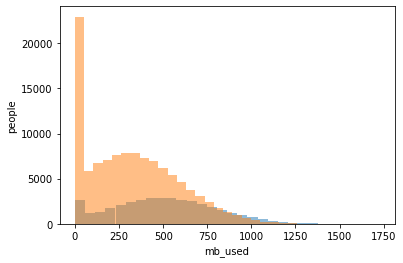

In [90]:
plt.hist(np.array(internet_users_tarif.query('tariff == "ultra"')['mb_used']), bins=30, alpha = 0.5)
plt.hist(np.array(internet_users_tarif.query('tariff == "smart"')['mb_used']), bins=30, alpha = 0.5)
plt.ylabel("people")
plt.xlabel("mb_used")


В этом разде мы провели несолько исследований, так мы узнали, что пользаватели тарифа smart в среднем разговаривают на 1000 минут больше, чем пользователи тарифа ultra. Также мы можем это наблюдать на графике нормального распределения, основаня доля звонков у нас приходится от 0 до 5 минут.
Далее мы посмотреи, сколько в среднем отправляют пользователи разных тарифов в месяц сообщений, и увидели, что пользаватели тарифа smart в среднем отправляют на 70 сообщений больше, чем пользователи тарифа ultra. Также мы наблюдаем, что дисперсия достаточно большая у пользователей тарифа ultra, можем сделать вывод, что там достаточно большой разброс данных, эту теорию подтвержает нам график нормального распределения.
В конце мы рассмотрели сколько гигабайт интернет трафика тратят люди с разным тарифом. Так мы увидели, что пользаватели тарифа smart в среднем тратят на 40 гигабайт больше, чем пользователи тарифа ultra. Так средее показание трафика в тарифе ultra за раз 500 мб, а в тарифе smart 300 мб, это можно увидеть на графике нормального распределения.

### 4 Проверяю гипотезы

In [91]:
tarult = common.query('tariff == "ultra"')

In [92]:
tarult['total'] = tarult['total'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
datone = tarult['total'].unique()
datone

array([1950, 3764, 2715, 2603, 3885, 4736, 2847, 3293, 2335, 2437, 2232,
       2595, 2439, 2318, 2235, 3042, 2823, 3623, 2129, 2376, 2796, 2122,
       2918, 2065, 2815, 2534, 2334, 3833, 2007, 2136, 3191, 3031, 3666,
       3628, 3149, 3417, 3207, 2321, 2144, 2311, 1995, 2203, 2767, 3869,
       2581, 3545, 4532, 2029, 2504, 2222, 3796, 2050, 1990, 2886, 3746,
       2958, 4068, 3541, 3146, 2911, 2926, 2361, 2419, 2206, 3304, 2476,
       2428, 2323, 2749, 2474, 2331, 3058, 3938, 2627, 2560, 3608, 1993,
       2653, 3224, 2214, 2300, 2403, 2219, 2277, 2198, 2276, 2511, 2202,
       2416, 2019, 3694, 3299, 2282, 3258, 3334, 3639, 3010, 2290, 2868,
       2237, 3793, 2114, 2229, 2026, 2951, 2677, 2463, 2478, 3061, 2649,
       2073, 1987, 2990, 2126, 2673, 3426, 2880, 3133, 3250, 2242, 2852,
       2248, 3070, 2059, 3162, 2289, 2386, 2340, 2650, 3649, 3710, 2293,
       3153])

In [94]:
tarsmar = common.query('tariff == "smart"')

In [95]:
tarsmar['total'] = tarsmar['total'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
dattwo = tarsmar['total'].unique()

In [97]:
alpha = .05
results = st.ttest_ind(
    datone,
    dattwo)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.145857422875517e-51
Отвергаем нулевую гипотезу


In [98]:
common

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,gb_used,call_price,messages_price,internet_price,total
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2253.49,...,1950,150,1,1,30.0,2.200674,-2844.94,-978.0,-4169.898926,1950.000000
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23233.77,...,1950,150,1,1,30.0,22.689229,-2826.10,-940.0,-1096.615723,1950.000000
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14003.64,...,1950,150,1,1,30.0,13.675430,-2675.20,-925.0,-2448.685547,1950.000000
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14055.93,...,1950,150,1,1,30.0,13.726494,-2600.13,-919.0,-2441.025879,1950.000000
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,14568.91,...,1950,150,1,1,30.0,14.227451,-2547.86,-943.0,-2365.882324,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,20579.36,...,550,200,3,3,15.0,20.097031,-769.11,-24.0,1019.406250,1569.406250
3199,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,1845.75,...,550,200,3,3,15.0,1.802490,-1303.05,-117.0,-2639.501953,550.000000
3200,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,17788.51,...,550,200,3,3,15.0,17.371592,-138.27,-6.0,474.318359,1024.318359
3201,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,17963.31,...,550,200,3,3,15.0,17.542295,265.50,27.0,508.458984,1350.958984


In [99]:
cityone = common.query('city == "Москва"')

In [100]:
cityone['total']

8       1950.000000
9       1950.000000
10      1950.000000
11      1950.000000
12      1950.000000
           ...     
3163     924.095703
3164     550.000000
3165    1586.126953
3166    1204.816406
3167     633.152344
Name: total, Length: 611, dtype: float64

In [101]:
citytwo = common.query('city != "Москва"')

In [102]:
citytwo['total']

0       1950.000000
1       1950.000000
2       1950.000000
3       1950.000000
4       1950.000000
           ...     
3198    1569.406250
3199     550.000000
3200    1024.318359
3201    1350.958984
3202     598.000000
Name: total, Length: 2592, dtype: float64

In [103]:
alpha = .05
results = st.ttest_ind(
    cityone['total'],
    citytwo['total'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4192731577068969
Не получилось отвергнуть нулевую гипотезу


В перовм случае, мы проверяли среднюю выручку пользователей тарифов «Ультра» и «Смарт» на нулевую гипотизу. Так мы выяснили, что нулевая гипотиза отвержена, это означает, что средняя выручка у пользавателей тарифов разная.
В тоже время, когда мы проверяли среднюю выручку пользователей из Москвы и других городов, мы увидели, что тут уже не получилось овтергнуть нулевую гипотезу. Полученное значение p-value говорит о том, что хотя средняя выручка на разных тарифах, с вероятностью 40% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой.
Когда генеральных совокупностей две, бывает нужно сопоставить их средние. Тогда лучше всего для этого служит гипотеза о равенстве средних двух генеральных совокупностей


## Выводы

Исходя из проделанной работы работы можно подвести итоги, что был проанализирован датасет "Определение перспективного тарифа для телеком компании" подсчитаны и сделаны выводы, что:
 - Были подсчитаны сколько денег в среднем тратят пользаватели
 - В тарифе smart пользователи разговаривают больше, чем в тарифе ultra
 - В тарифе smart пользователи отправляют сообщений больше, чем в тарифе ultra
 - В тарифе smart пользователи больше расходуют интернет трафик, чем в тарифе ultra
 - Также узнали, что Москва и регионы разнятся в средней выручке используемых тарифных пакетах
 
 Подводя итог, можно сделать вывод, что тариф smart более популярен у пользавателей, им более активно пользуются, но тариф ultra тоже себя хорошо зарекомендовал и на него тоже есть большой спрос.
 
 
